# Main Library

In [1]:
# Reading Data & Visualization
import os
import random
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing & Training Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

import tensorflow as tf
import tensorflow.keras as k
from keras.layers import Dense, Dropout, Conv2D, Activation

# Loading Model
import pickle

## Reading Image

In [2]:
# Reading image

train_list = os.listdir(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\train")
test_list = os.listdir(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test")

train_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\train"
test_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test"


image_train = []
image_test = []

label_train = []

count_dog = 0
count_cat = 0


for image in train_list:
    if image.split(".")[0] == "dog":
        label_train.append(1)
        count_dog += 1
    else:
        label_train.append(0)
        count_cat += 1
    
    input_image = cv2.imread(train_path + "\\" + image)
    input_image = cv2.resize(input_image, (128, 128))
    image_train.append(input_image)
    
    
for image in test_list:
    input_image = cv2.imread(test_path + "\\" + image)
    input_image = cv2.resize(input_image, (128, 128))
    image_test.append(input_image)
    
count_dog, count_cat, len(label_train)

(12500, 12500, 25000)

## Prepering Data

In [3]:
data_train = np.array(image_train)
data_train = data_train.astype("float32")
data_train = data_train / 255.0

data_test = np.array(image_test)
data_test = data_test.astype("float32")
data_test = data_test / 255.0

label_train = np.array(label_train)

print(data_train.shape)

(25000, 128, 128, 3)


In [4]:
name_label = ["Cat", "Dog"]

image_label = np_utils.to_categorical(label_train, len(name_label))

In [5]:
x_img, y_img = shuffle(data_train, image_label, random_state=2)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8, random_state=42)

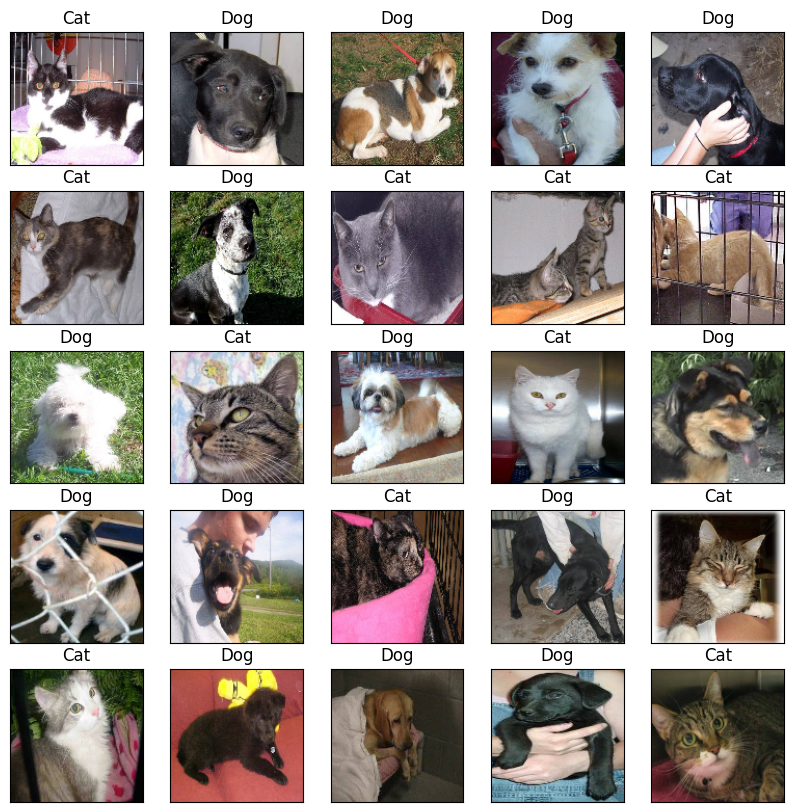

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    image = random.choice(range(len(x_train)))
    new_image = cv2.cvtColor(x_train[image], cv2.COLOR_BGR2RGB)
    plt.imshow(new_image)
    plt.title(name_label[y_train[image].argmax()])

## ======================================================================
## ======================================================================
## ======================================================================
## ======================================================================
## ======================================================================
## ======================================================================

# Building Model ==> CNN Model

In [7]:
model_cnn = k.models.Sequential()

model_cnn.add(Conv2D(16, (5, 5), input_shape=(128, 128, 3), activation="relu", padding="same"))
model_cnn.add(k.layers.AveragePooling2D(2, 2))

model_cnn.add(Conv2D(32, (4, 4), activation="relu", padding="same"))
model_cnn.add(Activation("relu"))
model_cnn.add(k.layers.AveragePooling2D(2, 2))

model_cnn.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model_cnn.add(k.layers.AveragePooling2D(2, 2))

model_cnn.add(Conv2D(128, (2, 2), activation="relu", padding="same"))
model_cnn.add(k.layers.MaxPool2D(2, 2))

# ===================================================================================================
model_cnn.add(k.layers.Flatten())
model_cnn.add(Dense(128, activation="sigmoid"))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(32, activation="sigmoid"))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(2, activation="softmax"))

model_cnn.compile(optimizer="nadam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 64, 64, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        8224      
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [8]:
history = model_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 662s 1s/step - loss: 0.6563 - accuracy: 0.6009 - val_loss: 0.6135 - val_accuracy: 0.6584
Epoch 2/5
625/625 [==============================] - 624s 998ms/step - loss: 0.5903 - accuracy: 0.6877 - val_loss: 0.5558 - val_accuracy: 0.7118
Epoch 3/5
625/625 [==============================] - 629s 1s/step - loss: 0.5312 - accuracy: 0.7340 - val_loss: 0.5115 - val_accuracy: 0.7520
Epoch 4/5
625/625 [==============================] - 628s 1s/step - loss: 0.4781 - accuracy: 0.7707 - val_loss: 0.4640 - val_accuracy: 0.7862
Epoch 5/5
625/625 [==============================] - 625s 1s/step - loss: 0.4336 - accuracy: 0.7955 - val_loss: 0.4330 - val_accuracy: 0.8014


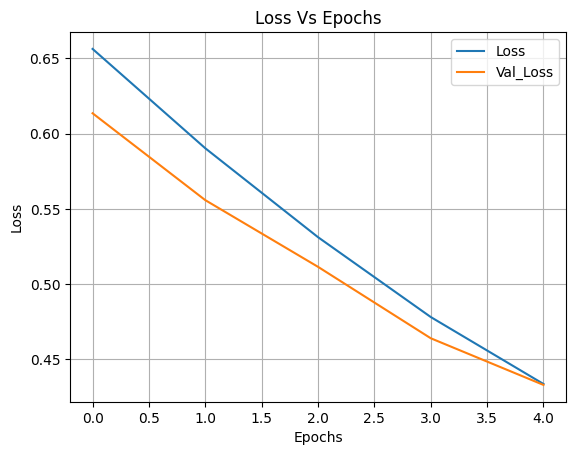

In [9]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

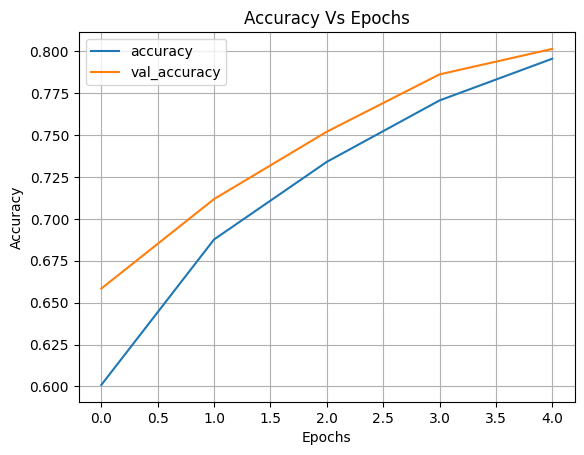

In [10]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [11]:
loss, accuracy = model_cnn.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

157/157 [==============================] - 25s 156ms/step - loss: 0.4330 - accuracy: 0.8014
The Accuracy Testing Data is ==> 0.8014000058174133 %
The loss Testing Data is ==> 0.43298599123954773


## ==========================================================================
## ==========================================================================
## ==========================================================================
## ==========================================================================

## Download Model

In [14]:
pickle.dump(model_cnn, open("D:\Pycharm\model_pickle\Dogs&Cats_without_pretraining_mode.bin", "wb"))

# System Prediction

D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\test\38.jpg
1/1 [==============================] - 0s 38ms/step
The Prediction is ==>  Cat


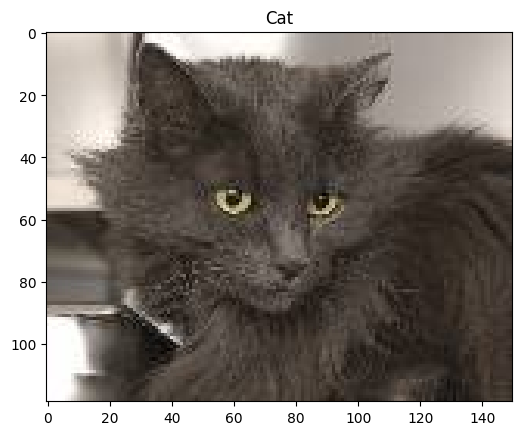

In [17]:
path_img = input()
image = cv2.imread(path_img)
image_pre_new = cv2.resize(image, (128, 128))
image_pre_new = np.reshape(image_pre_new, [1, 128, 128, 3])
prediction = model_cnn.predict(image_pre_new)


# print(prediction)
new_prediction = name_label[np.argmax(prediction)]
print("The Prediction is ==> ", new_prediction)

# ================== Show image And Label Prediction =================================
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()

In [24]:
prediction = model_cnn.predict(data_test)

391/391 [==============================] - 56s 143ms/step


In [26]:
prediction = [pre.argmax() for pre in prediction]

In [34]:
prediction

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,


In [35]:
len(prediction)

12500

In [28]:
import pandas as pd

In [37]:
data = pd.DataFrame({"id": list(range(1, len(prediction)+1)),
                     "label": prediction})

In [38]:
data.head(10)

,id,label
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1
5,6,0
6,7,0
7,8,1
8,9,1
9,10,0


In [39]:
data.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Dogs-Vs-Cats\submation_data.csv", index=False)